# gtfs file relationship
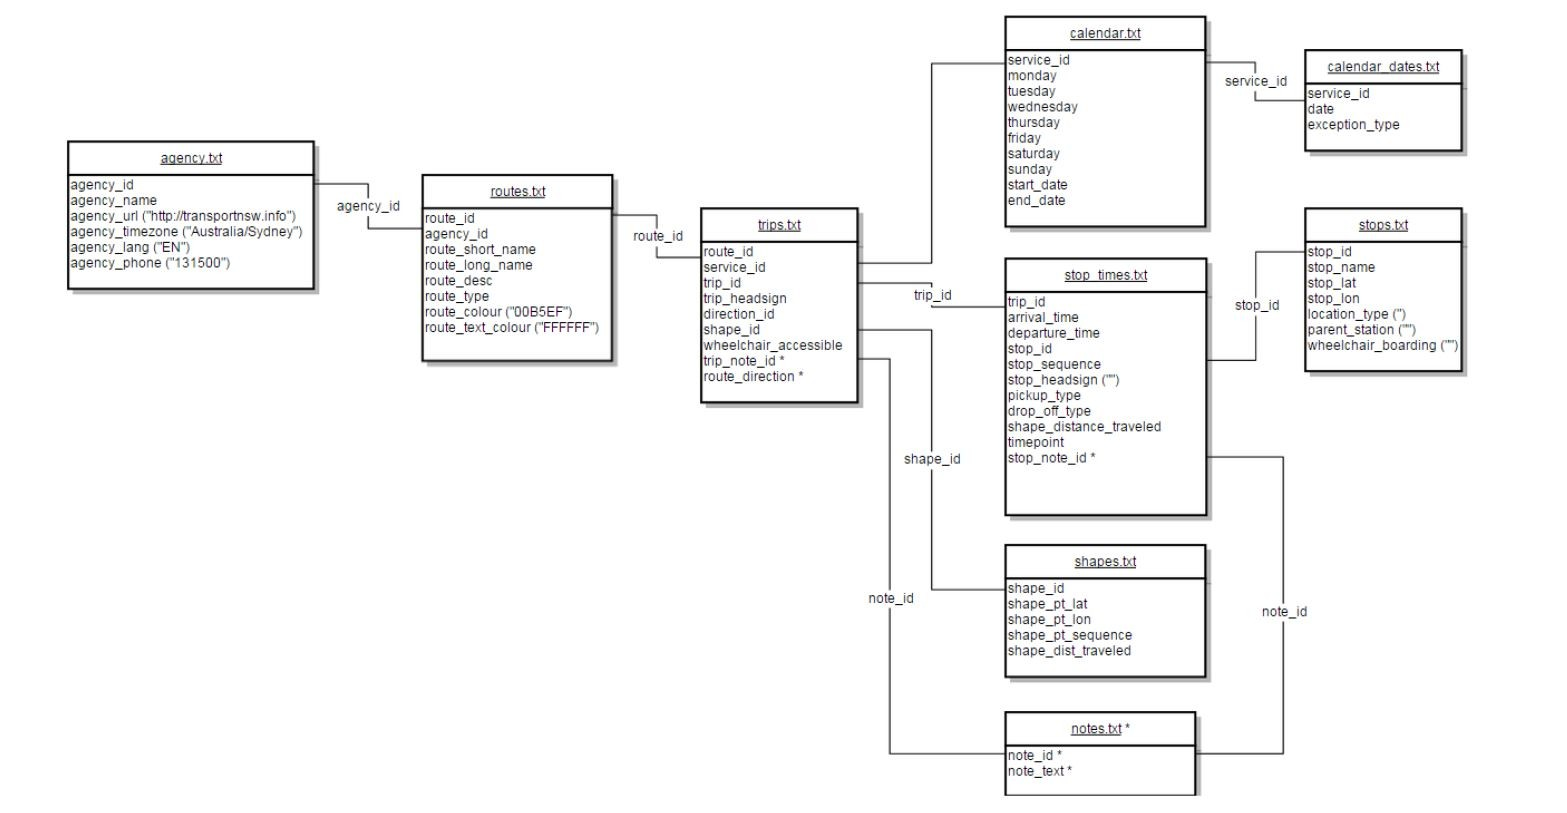

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
%matplotlib inline

In [12]:
df_agency = pd.read_csv('agency.csv')
df_calendar = pd.read_csv('calendar.csv')
df_routes = pd.read_csv('routes.csv')
df_shapes = pd.read_csv('shapes.csv')
df_stop_times = pd.read_csv('stop_times.csv',dtype={"stop_id": str,"stop_headsign":str})
df_stops = pd.read_csv('stops.csv')
df_trips = pd.read_csv('trips.csv')

df_stop_times['stop_id'] = df_stop_times['stop_id'].astype('str')

In [ ]:
# merge agency.csv and routes.csv
df_update = pd.merge(df_routes,df_agency,on='agency_id')
# merge trips.csv
df_update = pd.merge(df_trips,df_update,on='route_id')
# merge calendar.csv
df_update = pd.merge(df_update,df_calendar,on='service_id')

# merge stop_times.csv and stops.csv
df_update_stop = pd.merge(df_stops,df_stop_times,on='stop_id')

# merge df_update and df_update_stop
df = pd.merge(df_update,df_update_stop,on='trip_id')

df.columns

In [ ]:
df = df.drop(['stop_desc','zone_id','stop_url','stop_timezone','shape_dist_traveled',
                     'trip_short_name','route_url','agency_phone','agency_lang',
                     'agency_url','route_desc','agency_id', 'stop_headsign','stop_code'], axis=1)

# Services with route_id as RTTA_DEF or RTTA_REV are non-revenue services and should be excluded 
df = df[(df['route_id'] != 'RTTA_DEF')]
df = df[(df['route_id'] != 'RTTA_REV')]

# replace the null value to 'No BlockID'
df['block_id'].fillna('No BlockID',inplace=True)

In [ ]:
# checke the NaN value 
# plt.figure(figsize=(20,6))
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df[df.isnull()].count()

In [ ]:
df.sort_values(['start_date','route_id','trip_id'],ascending=[True,True,True],inplace=True)
df.head()

In [ ]:
df.trip_headsign.

In [ ]:
# rearrage the order of columns
df = df[['start_date', 'end_date',
         'arrival_time', 'departure_time',
         'route_id','route_short_name','route_long_name', 'route_type','route_color', 'route_text_color',
         'service_id', 'trip_id', 'trip_headsign', 'direction_id',
         'stop_id','stop_name','stop_sequence','pickup_type','drop_off_type','block_id','shape_id',   
         'stop_lat', 'stop_lon','location_type', 'parent_station', 'wheelchair_accessible', 'wheelchair_boarding',
         'monday', 'tuesday', 'wednesday','thursday', 'friday', 'saturday', 'sunday',
         'agency_name', 'agency_timezone']]
df.reset_index(drop=True,inplace=True)

In [ ]:
df = df.astype({"route_id": str, 
                "parent_station": str, 
                "end_date" : str, 
                "start_date" : str,
                "block_id": str})

In [ ]:
today = date.today().strftime("%Y%m%d")
print("Today's date:", today)

df[df.start_date == today]

In [ ]:
df.to_csv('timetable_' + today + '.csv',index=False)